# Atividade Prática 1 - Dataset Notas

Vamos obter informações sobre o rendimento de alunos de um curso em algumas disciplinas ao longo dos anos.

O primeiro arquivo contido no Dataset Notas, historico-alg1_SIGA_ANONIMIZADO.csv, refere-se ao aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.

A primeira coluna ("matricula") é composta por números inteiros, onde cada número representa um indivíduo. Assim, repetições nessa coluna indicam que o estudante fez mais de uma vez a mesma matéria.

Atenção: R-nota indica REPROVAÇÃO POR NOTA e R-freq REPROVAÇÃO POR FALTA. Se houver outro "status" para representar reprovação, este dever ser trocado para o rótulo adequado (R-nota ou R-freq). Frequências < 75 causam reprovação por falta; Médias abaixo de 50 causam reprovação por nota.

Analise o dataset do referido arquivo para responder as seguintes perguntas:

1. Qual é a média de nota dos aprovados (no período total e por ano)?

2. Qual é a média de nota dos reprovados por nota (período total e ano)?

3. Qual é a frequência dos reprovados por nota (período total e por ano)?

4. Qual a porcentagem de evasões (total e anual)?

5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

In [607]:
import pandas as pd
import matplotlib.pyplot as plt

In [608]:
SIGA = pd.read_csv('historico-alg1_SIGA_ANONIMIZADO.csv')

In [609]:
SIGA.head(2)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
0,0,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,67,96,Aprovado,TURMA,C,Obrigatória,Conclusão formatura,NaN,21A
1,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,73,R-freq,TURMA,NaN,Obrigatória,Registro ativo,A,21A


## 1. Qual é a média de nota dos aprovados (no período total e por ano)?

In [610]:
SIGA['status'].unique()

array(['Aprovado', 'R-freq', 'R-nota', 'Cancelado', 'Matriculado',
       'Reprovado'], dtype=object)

In [611]:
aprovados = SIGA[SIGA['status'] == 'Aprovado']
aprovados.head(2)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
0,0,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,67,96,Aprovado,TURMA,C,Obrigatória,Conclusão formatura,NaN,21A
9,2,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2015,Sim,60,72,96,Aprovado,TURMA,NaN,Obrigatória,Conclusão formatura,NaN,21A


In [612]:
media_aprovados_geral = aprovados['nota'].mean()
media_aprovados_geral

60.017628205128204

In [613]:
media_aprovados_por_ano = aprovados.groupby('ano')['nota'].mean()
media_aprovados_por_ano

ano
2011    50.000000
2013    70.375000
2014    72.142857
2015    63.678571
2016    67.391304
2017    74.710145
2018    70.869565
2019    31.450495
2020    72.400000
2021    83.882353
2022    76.428571
Name: nota, dtype: float64

<Axes: xlabel='ano'>

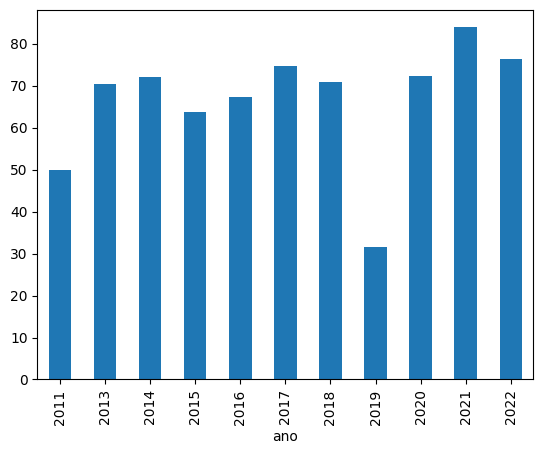

In [614]:
media_aprovados_por_ano.plot(kind='bar')

## 2. Qual é a média de nota dos reprovados por nota (período total e ano)?

### 2.1 Ajuste de registros  dos alunos cujo status está apenas como 'Reprovado', sem discriminação de se se trata de reprovação por nota ('R-nota') ou frequência ('R-freq').

In [615]:
rotulos_reprovados = ['R-nota', 'Reprovado', 'R-freq']

reprovados = SIGA[SIGA['status'].isin(rotulos_reprovados)]
reprovados.head()

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
1,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,73,R-freq,TURMA,NaN,Obrigatória,Registro ativo,A,21A
2,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2019,Sim,60,11,76,R-nota,TURMA,NaN,Obrigatória,Registro ativo,B,21A
5,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2021,Sim,60,3,17,R-freq,TURMA,NaN,Obrigatória,Registro ativo,A,21A
6,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2021,Sim,60,21,80,R-nota,TURMA,NaN,Obrigatória,Registro ativo,D,21A
7,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,0,25,R-freq,TURMA,NaN,Obrigatória,Registro ativo,BCC2,21A


In [616]:
reprovados['status'].value_counts()

status
R-nota       162
R-freq        49
Reprovado      1
Name: count, dtype: int64

In [617]:
reprovados[reprovados['status'] == 'Reprovado']

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
165,95,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,Anual,2019,Sim,60,5,0,Reprovado,APROVEITAMENTO,NaN,-,Registro ativo,NaN,21A


In [618]:
reprovados.loc[reprovados['status'] == 'Reprovado', 'status'] = 'R-freq'
reprovados['status'].value_counts()

status
R-nota    162
R-freq     50
Name: count, dtype: int64

### 2.2 Médias dos reprovados por nota

In [619]:
reprovados_por_nota = reprovados[reprovados['status'] == 'R-nota']
reprovados_por_nota.head(3)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
2,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2019,Sim,60,11,76,R-nota,TURMA,NaN,Obrigatória,Registro ativo,B,21A
6,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2021,Sim,60,21,80,R-nota,TURMA,NaN,Obrigatória,Registro ativo,D,21A
13,5,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Não,60,1,83,R-nota,TURMA,NaN,-,Registro ativo,D,21A


In [620]:
media_geral_reprovados_por_nota = reprovados_por_nota['nota'].mean()
media_geral_reprovados_por_nota

22.037037037037038

In [621]:
media_por_ano_reprovados_por_nota = reprovados_por_nota.groupby('ano')['nota'].mean()
media_por_ano_reprovados_por_nota

ano
2012    24.000000
2013    30.000000
2014    25.000000
2015    19.833333
2016    15.400000
2017    25.904762
2018    23.136364
2019    23.321429
2020    25.875000
2021    19.589744
2022    19.777778
Name: nota, dtype: float64

<Axes: xlabel='ano'>

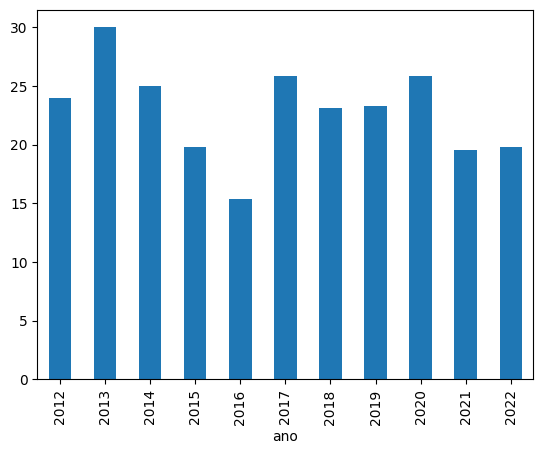

In [622]:
media_por_ano_reprovados_por_nota.plot(kind='bar')

## 3. Qual é a frequência dos reprovados por nota (período total e por ano)?

In [623]:
frequencia_geral_reprovados_por_nota = reprovados_por_nota['frequencia'].mean()
frequencia_geral_reprovados_por_nota

93.85802469135803

In [624]:
frequencia_por_ano_reprovados_por_nota = reprovados_por_nota.groupby('ano')['frequencia'].mean()
frequencia_por_ano_reprovados_por_nota

ano
2012     98.000000
2013    100.000000
2014     90.000000
2015     94.666667
2016     86.200000
2017     93.666667
2018     93.454545
2019     90.892857
2020     96.125000
2021     94.923077
2022     95.592593
Name: frequencia, dtype: float64

<Axes: xlabel='ano'>

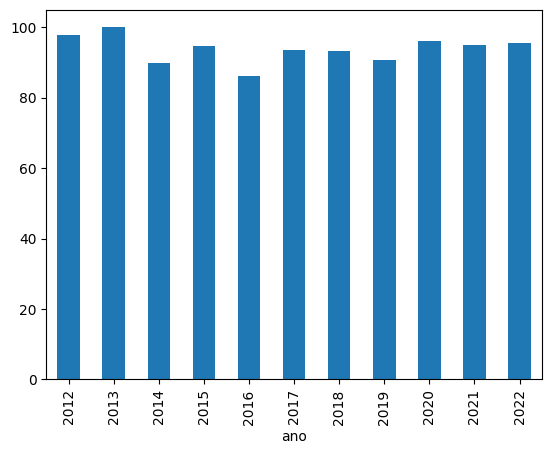

In [625]:
frequencia_por_ano_reprovados_por_nota.plot(kind='bar')

## 4. Qual a porcentagem de evasões (total e anual)?

In [626]:
SIGA['situacaoDiscente'].value_counts()

situacaoDiscente
Registro ativo         610
Evasão                 142
Conclusão formatura    103
Trancamento             54
Name: count, dtype: int64

In [627]:
porcentagem_geral_evasoes = SIGA[SIGA['situacaoDiscente'] == 'Evasão']['situacaoDiscente'].count()/SIGA['situacaoDiscente'].count() * 100
porcentagem_geral_evasoes

15.62156215621562

In [628]:
SIGA.groupby('ano')['situacaoDiscente'].count()

ano
2011      1
2012      4
2013     11
2014     13
2015     35
2016     53
2017     92
2018     96
2019    238
2020    106
2021    138
2022    122
Name: situacaoDiscente, dtype: int64

In [629]:
porcentagem_evasoes_por_ano = SIGA.groupby('ano')['situacaoDiscente'].value_counts()/SIGA.groupby('ano')['situacaoDiscente'].count() * 100
porcentagem_evasoes_por_ano

ano   situacaoDiscente   
2011  Conclusão formatura    100.000000
2012  Conclusão formatura     50.000000
      Registro ativo          50.000000
2013  Evasão                  63.636364
      Registro ativo          18.181818
      Conclusão formatura     18.181818
2014  Conclusão formatura     61.538462
      Evasão                  23.076923
      Registro ativo          15.384615
2015  Conclusão formatura     45.714286
      Registro ativo          28.571429
      Evasão                  20.000000
      Trancamento              5.714286
2016  Conclusão formatura     54.716981
      Registro ativo          20.754717
      Evasão                  15.094340
      Trancamento              9.433962
2017  Registro ativo          50.000000
      Conclusão formatura     25.000000
      Evasão                  18.478261
      Trancamento              6.521739
2018  Registro ativo          65.625000
      Evasão                  22.916667
      Trancamento              6.250000
      Conclusã

<Axes: xlabel='ano,situacaoDiscente'>

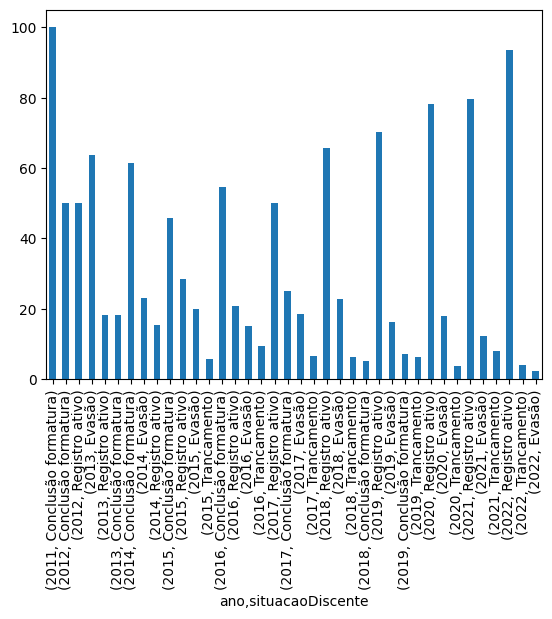

In [630]:
porcentagem_evasoes_por_ano.plot(kind='bar')

## 5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

De acordo com o que pode ser observado nos gráficos a respeito dos anos da pandameia em que houve mais distanciamento social (2020 e 2021), tem-se que as taxas de evasão foram menores do que a média dos anos anteriores. A frequência dos aprovados foi semelhante à dos períodos sem distanciamento, porém as notas dos aprovados foram superiores.

## 6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

In [631]:
turmas_2022 = SIGA[SIGA['ano'] == 2022]
turmas_2022.head(2)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
7,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,0,25,R-freq,TURMA,NaN,Obrigatória,Registro ativo,BCC2,21A
8,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2022,Sim,60,0,0,Matriculado,TURMA,NaN,Obrigatória,Registro ativo,BCC1,21A


In [632]:
turmas_2022_1 = turmas_2022[turmas_2022['periodo'] == '1']

turmas_2022_1.head(2)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
7,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,0,25,R-freq,TURMA,NaN,Obrigatória,Registro ativo,BCC2,21A
10,3,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,72,100,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,BCC1,21A


In [633]:
nota_media_aprovados_turmas_2022_1 = turmas_2022_1[turmas_2022_1['status'] == 'Aprovado']['nota'].mean()
nota_media_aprovados_turmas_2022_1

76.42857142857143

In [634]:
nota_media_reprovados_por_nota_turmas_2022_1 = turmas_2022_1[turmas_2022_1['status'] == 'R-nota']['nota'].mean()
nota_media_reprovados_por_nota_turmas_2022_1

19.77777777777778

In [635]:
frequencia_turmas_2022_1_reprovados_nota = turmas_2022_1[turmas_2022_1['status'] == 'R-nota']['frequencia'].mean()
frequencia_turmas_2022_1_reprovados_nota

95.5925925925926

In [636]:
porcentagem_evasoes_turmas_2022_1 = turmas_2022_1[turmas_2022_1['situacaoDiscente'] == 'Evasão']['situacaoDiscente'].count()/turmas_2022_1['situacaoDiscente'].count() * 100
porcentagem_evasoes_turmas_2022_1

3.1578947368421053

A volta às aulas híbrida teve a menor taxa de evasão da série histórica. A frequência dos reprovados por nota foi bastante alta, a maior da série histórica. A nota dos aprovados no período híbrido foi maior do que a média histórica, sendo menor apenas que a do período remoto.

## 7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

In [637]:
turmas_2022_2 = turmas_2022[turmas_2022['periodo'] == '2']
turmas_2022_2.head(2)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
8,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2022,Sim,60,0,0,Matriculado,TURMA,NaN,Obrigatória,Registro ativo,BCC1,21A
12,4,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2022,Sim,60,0,0,Matriculado,TURMA,NaN,Obrigatória,Registro ativo,BCC1,21A


In [638]:
turmas_2022_2['nota'].value_counts()

nota
0    27
Name: count, dtype: int64

In [639]:
nota_media_aprovados_turmas_2022_2 = turmas_2022_2[turmas_2022_2['status'] == 'Aprovado']['nota'].mean()
nota_media_aprovados_turmas_2022_2

nan

In [640]:
nota_media_reprovados_por_nota_turmas_2022_2 = turmas_2022_2[turmas_2022_2['status'] == 'Aprovado']['nota'].mean()
nota_media_reprovados_por_nota_turmas_2022_2

nan

Os dados do período de volta às aulas presencial, segundo semestre de 2022 não está finalizado no banco de dados utilizado, o que impossibilita sua análise, bem como a comparação com o período anterior.